In [1]:
import time
a = time.time()
import pandas as pd
import numpy as np

key = input('要爬蟲選1，預測投組選2: ')
if key == '1':
    from tool_class import Tool
    website = input('爬蟲網址 ex:https://www.rocketfinancial.com/Holdings.aspx?fID=250: ')
    f13_data = Tool.crawler(website)
    f13_data.to_csv('lone_pine.csv', index=False)
elif key == '2':
    import tool_class
    f13_data = pd.read_csv('lone_pine.csv')
    price_data = pd.read_csv('liquidity+highlow+class.csv', encoding='utf8', low_memory=False)
    industry = pd.read_csv('industry2.csv')
    asset = pd.read_csv('asset and book value.csv')

    date = input('本月月份(結果為預期下個月的投組): ')
    tool = tool_class.Tool(f13_data, price_data, industry, asset, date)

    feature_data = tool.training_set()

    testing_data = tool.testing_set()

    last_buy_count = len(feature_data[feature_data['buy']==1])
    not_buy_count = len(feature_data[feature_data['buy']==0])
    start = last_buy_count+1

    while start + last_buy_count * 2 < len(feature_data):
        t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:int(start+last_buy_count*1)]])
        x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        y = t_data[['buy']].values
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        svc_clf = tool.svc_model(x, y)
        if svc_clf is not False:
            y_pred = svc_clf.predict(x_test)
            testing_data.loc[:, 'svc'] = y_pred
            testing_data = testing_data[testing_data['svc']==1]
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        rft_clf = tool.rft_model(x, y)
        if rft_clf is not False:
            y_pred = rft_clf.predict(x_test)
            testing_data.loc[:, 'rtf'] = y_pred
            testing_data = testing_data[testing_data['rtf']==1]
        start = int(start+last_buy_count*1)
    t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:]])
    x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    y = t_data[['buy']].values
    x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    svc_clf = tool.svc_model(x, y)
    if svc_clf is not False:
        y_pred = svc_clf.predict(x_test)
        testing_data.loc[:, 'svc'] = y_pred
        testing_data = testing_data[testing_data['svc']==1]
    x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    rft_clf = tool.rft_model(x, y)
    if rft_clf is not False:
        y_pred = rft_clf.predict(x_test)
        testing_data.loc[:, 'rtf'] = y_pred
        testing_data = testing_data[testing_data['rtf']==1]

    print(list(testing_data['ticker']))
    
b = time.time()
print(b-a)

要爬蟲選1，預測投組選2: 2
本月月份(結果為預期下個月的投組): 201902


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['ABT', 'ATUS', 'AZN', 'BHC', 'CRM', 'EA', 'EBAY', 'ERIC', 'LLY', 'LOW', 'MRK', 'NIO', 'PYPL', 'TSLA', 'UAA', 'WU']
29.217978477478027


In [4]:
feature_data

,ticker,class,volatility,liquidity,52 week high,momentum,buy
0,A,0,629052.0,1.949237,1.461043,1.117476,1
1,ADBE,0,517437.0,1.048859,1.773829,1.265417,1
2,AMZN,0,1379892.0,2.847440,1.804969,1.355318,1
3,ATVI,0,1401117.0,1.846899,1.588046,1.180315,1
4,AVGO,0,729521.0,1.777209,1.360516,1.006831,1
5,BABA,0,4450295.0,3.919200,2.005865,1.225891,1
6,BKNG,0,114429.0,2.369670,1.152431,1.000000,1
7,BLK,0,132838.0,0.826523,1.584520,1.214609,1
8,BUD,0,410904.0,3.228017,1.221716,0.957034,1
9,CRM,0,1114404.0,1.542855,1.430937,1.186789,1


In [10]:
a_date = []
for i in range(200501, 201913, 1):
    i = str(i)
    if 1 <= int(i[4:]) <= 12:
        a_date.append(i)

In [ ]:
import time
import pandas as pd
import numpy as np
import tool_class
f13_data = pd.read_csv('lone_pine.csv')
price_data = pd.read_csv('liquidity+highlow+class.csv', encoding='utf8', low_memory=False)
industry = pd.read_csv('industry2.csv')
asset = pd.read_csv('asset and book value.csv')
our_revenue = []
lone_pine_revenue = []
error_date = []
final_df = pd.DataFrame()
for index in range(0, len(a_date)-1, 1):
    c = time.time()
    f13_data1 = f13_data.copy()
    price_data1 = price_data.copy()
    industry1 = industry.copy()
    asset1 = asset.copy()
    date = str(a_date[index])
    print(date)
    if int(date[4:]) == 1 or int(date[4:]) == 11:
        seanson_date = str(int(date[0:4])-1) + '12'
    elif int(date[4:]) == 4 or int(date[4:]) == 2:
        seanson_date = date[0:4] + '03'
    elif int(date[4:]) == 7 or int(date[4:]) == 5:
        seanson_date = date[0:4] + '06'
    elif int(date[4:]) == 10 or int(date[4:]) == 8:
        seanson_date = date[0:4] + '09'
    else:
        seanson_date = date
    tool = tool_class.Tool(f13_data1, price_data1, industry1, asset1, date)

    feature_data = tool.training_set()

    testing_data = tool.testing_set()

    last_buy_count = len(feature_data[feature_data['buy']==1])
    not_buy_count = len(feature_data[feature_data['buy']==0])
    start = last_buy_count+1
    
    try:
        testing_len = len(testing_data)
        while start + last_buy_count * 2 < len(feature_data):# 比例
            t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:int(start+last_buy_count*1)]])# 比例
            x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
            y = t_data[['buy']].values
            x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
            svc_clf = tool.svc_model(x, y)
            if svc_clf is not False:
                y_pred = svc_clf.predict(x_test)
                testing_data.loc[:, 'svc'] = y_pred
                testing_data = testing_data[testing_data['svc']==1]
            x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
            rft_clf = tool.rft_model(x, y)
            if rft_clf is not False:
                y_pred = rft_clf.predict(x_test)
                testing_data.loc[:, 'rtf'] = y_pred
                testing_data = testing_data[testing_data['rtf']==1]
            start = start+int(last_buy_count*1)# 比例
        
        t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:]])
        x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        y = t_data[['buy']].values
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        svc_clf = tool.svc_model(x, y)
        if svc_clf is not False:
            y_pred = svc_clf.predict(x_test)
            testing_data.loc[:, 'svc'] = y_pred
            testing_data = testing_data[testing_data['svc']==1]
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        rft_clf = tool.rft_model(x, y)
        if rft_clf is not False:
            y_pred = rft_clf.predict(x_test)
            testing_data.loc[:, 'rtf'] = y_pred
            testing_data = testing_data[testing_data['rtf']==1]
        
        if testing_len != len(testing_data):
            df = pd.DataFrame({'date':str(a_date[index+1]), 'ticker':list(testing_data['ticker']), 'class':list(testing_data['class'])})
            final_df = pd.concat([final_df, df], ignore_index=True, sort=False)

            test = tool.price_data.merge(testing_data[['ticker', 'class']], left_on=['Ticker', 'Class'], right_on=['ticker', 'class'])
    #         now_df = test[test['Date']==date]# equal-weight
    #         next_df = test[test['Date']==str(a_date[index+1])]# equal-weight
    #         next_df = next_df[['Ticker', 'Class', 'PRC']]# equal-weight
    #         next_df.columns = ['Ticker', 'Class', 'next_PRC']# equal-weight
    #         price_df = now_df.merge(next_df, on=['Ticker', 'Class'])# equal-weight
    #         price_df.loc[:, 'revenue'] = price_df['next_PRC'] / price_df['PRC']# equal-weight
    #         our_revenue.append(sum(price_df['revenue']) / len(price_df))# equal-weight
            our_revenue.append(sum(test[test['Date']==str(a_date[index+1])]['PRC'])/sum(test[test['Date']==date]['PRC']))# price-weight


            def abcd(df_col):
                if df_col == 'A':
                    return df_col
                else:
                    return 0
            tdf = tool.f13_data[tool.f13_data['Date']==seanson_date][['Ticker', 'Class']]
            tdf['Class'] = tdf['Class'].apply(abcd)
            test1 = tool.price_data.merge(tdf, on=['Ticker', 'Class'])
    #         now_df = test1[test1['Date']==date]# equal-weight
    #         next_df = test1[test1['Date']==str(a_date[index+1])]# equal-weight
    #         next_df = next_df[['Ticker', 'Class', 'PRC']]# equal-weight
    #         next_df.columns = ['Ticker', 'Class', 'next_PRC']# equal-weight
    #         price_df = now_df.merge(next_df, on=['Ticker', 'Class'])# equal-weight
    #         price_df.loc[:, 'revenue'] = price_df['next_PRC'] / price_df['PRC']# equal-weight
    #         lone_pine_revenue.append(sum(price_df['revenue']) / len(price_df))# equal-weight
            lone_pine_revenue.append(sum(list(test1[test1['Date']==str(a_date[index+1])]['PRC'])) / sum(list(test1[test1['Date']==date]['PRC'])))# price-weight
        else:
            print(date,'no filter')
            error_date.append(date)
    except:
        print(date,'no data')
        error_date.append(date)
    
    b = time.time()
    print(b-c)

200501
56.50592875480652
200502


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


51.029566287994385
200503


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


48.85934615135193
200504


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


31.00510311126709
200505


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


31.105831146240234
200506


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


32.350520610809326
200507


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


24.235185623168945
200508


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.83691930770874
200509


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.308303594589233
200510


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.504533052444458
200511


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


20.946962594985962
200512


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.785757303237915
200601


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.65744113922119
200602


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200602 no filter
19.711278676986694
200603


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.03476047515869
200604


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


18.189364910125732
200605


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


18.383814573287964
200606


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


18.425768852233887
200607


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


18.204343557357788
200608


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


17.859233140945435
200609


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


18.401798248291016
200610


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.0174560546875
200611


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.12118935585022
200612


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


24.349894762039185
200701


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.85325527191162
200702


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


24.478550672531128
200703


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.943949222564697
200704


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.167094469070435
200705


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.23654317855835
200706


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.53504228591919
200707


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.601619720458984
200708


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.484164714813232
200709


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


200709 no filter
21.727938413619995
200710


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.27177596092224
200711


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.606882095336914
200712


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


24.134472370147705
200801


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.450299978256226
200802


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.325279474258423
200803


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.202666759490967
200804


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.08195996284485
200805


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.105897426605225
200806


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.35921597480774
200807


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.037079334259033
200808


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.289470672607422
200809


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.187644720077515
200810


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


26.787378311157227
200811


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


26.019464254379272
200812


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


26.872150421142578
200901


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


26.862176179885864
200902


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


26.43332529067993
200903


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


26.04935383796692
200904


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.762121438980103
200905


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.818934202194214
200906


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.452977418899536
200907


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.637457609176636
200908


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.40508460998535
200909


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.099884033203125
200910


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.518766164779663
200911


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.459893941879272
200912


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


26.154104709625244
201001


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


26.512110948562622
201002


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


25.97851061820984
201003


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


26.02242422103882
201004


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.650144338607788
201005


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.134817600250244
201006


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.88049840927124
201007


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.489542722702026
201008


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.431695461273193
201009


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.616204261779785
201010


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.248838901519775
201011


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.0091233253479
201012


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.862577438354492
201101


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.97724175453186
201102


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.09394073486328
201103


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.37413263320923
201104


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


21.34196972846985
201105


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.35522770881653
201106


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.956623554229736
201107


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


201107 no filter
20.998857975006104
201108


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.896778345108032
201109


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.28176474571228
201110


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.674362897872925
201111


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


22.71725845336914
201112


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


24.11851477622986
201201


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


24.118483781814575
201202


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


23.647772312164307
201203


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
feature_data[feature_data['buy']==1]

,ticker,class,volatility,liquidity,52 week high,momentum,buy
0,AAPL,0,3131989.0,7.789893,3.474112,1.763968,1
1,BBBY,0,582824.0,1.926016,1.300974,1.029965,1
2,BBY,0,706011.0,2.176380,1.400497,1.101180,1
3,BRO,0,77425.0,1.119651,1.483132,1.027911,1
4,BSC,0,180320.0,1.746525,1.388028,1.106224,1
5,CECO,0,524041.0,5.112745,2.641495,0.783899,1
6,CHK,0,608782.0,2.255483,1.523529,1.179783,1
7,COH,0,318217.0,1.684454,1.467057,1.137104,1
8,DELL,0,4432884.0,1.784357,1.308333,1.077098,1
9,DKS,0,117807.0,3.453434,2.426000,0.907430,1


In [13]:
our_revenue

[0.9388357848038571,
 0.9660402962417775,
 0.9545132178209502,
 1.053146729554439,
 1.006123754975663,
 1.0282033297741955,
 0.9820549079559205]

In [14]:
lone_pine_revenue

[0.9946078990457907,
 0.973148591491908,
 1.0772058065394725,
 1.1956297790533954,
 1.071074836552523,
 1.01761713369332,
 0.9786280532062506]

In [ ]:
o = 1
for i in our_revenue:
    o = o * i
print(o)

o = 1
for i in lone_pine_revenue:
    o = o * i
print(o)

In [3]:
len(final_df) / len(set(final_df['date']))

42.5

In [ ]:
# import pandas as pd
# import numpy as np
# pred_portfolio = pd.read_csv('pred_portfolio.csv')
# price_data = pd.read_csv('liquidity+highlow+class.csv', encoding='utf8', low_memory=False)

# def abc(aa):
#     return int(str(aa)[0:6])
# price_data['date'] = price_data['date'].apply(abc)
# price_data['SHRCLS'] = price_data['SHRCLS'].replace(np.nan, '0')

# price_data = price_data[['date', 'TICKER', 'SHRCLS', 'PRC']]
# price_data.columns = ['date', 'ticker', 'class', 'PRC']

# pred_portfolio.merge(price_data, on=['date', 'ticker', 'class']).to_csv('pred_portfolio.csv', index=False)

In [4]:
our_revenue_progressive = []
lone_pine_revenue_progressive = []
o = our_revenue[0]
our_revenue_progressive.append(o)
for i in our_revenue[1:]:
    o = o * i
    our_revenue_progressive.append(o)
    
o = lone_pine_revenue[0]
lone_pine_revenue_progressive.append(o)
for i in lone_pine_revenue[1:]:
    o = o * i
    lone_pine_revenue_progressive.append(o)

In [8]:
list(set(a_date[1:]).difference(set(error_date)))

['201104', '201107', '201504']

In [9]:
revenue_rate = pd.DataFrame({'date':list(set(a_date[1:]).difference(set(error_date))),
              'portfolio':our_revenue,
              'lone_pine':lone_pine_revenue,
              'portfolio_progressive':our_revenue_progressive,
             'lone_pine_progressive':lone_pine_revenue_progressive})
# .to_csv('revenue_rate.csv', index=False)

In [10]:
revenue_rate

,date,portfolio,lone_pine,portfolio_progressive,lone_pine_progressive
0,201807,0.891199,0.994608,0.891199,0.994608
1,201804,0.950364,0.973149,0.846963,0.967901
2,201512,0.946660,1.077206,0.801787,1.042629
3,201207,1.069218,1.195630,0.857285,1.246598
4,201603,0.958420,1.071075,0.821639,1.335200
5,201705,1.085645,1.017617,0.892009,1.358722
6,201901,0.966350,0.978628,0.861993,1.329684
7,201903,1.008111,1.057418,0.868984,1.406032
8,200807,0.990568,1.085776,0.860788,1.526636
9,201408,1.057208,1.067688,0.910032,1.629970


In [29]:
import pandas as pd
# revenue_rate = pd.read_csv('revenue_rate.csv')
snp500 = pd.read_csv('sp500.csv')

In [30]:
snp500['last_close'] = snp500['Close'].shift()

In [31]:
snp500['close_rate'] = snp500['Close'] / snp500['last_close']

In [37]:
t = list(snp500['close_rate'])
snp500_close = []
o = t[1]
snp500_close.append(o)
for i in t[2:]:
    o = o * i
    snp500_close.append(o)

In [33]:
# our_revenue_progressive = list(revenue_rate['portfolio_progressive'])
# lone_pine_revenue_progressive = list(revenue_rate['lone_pine_progressive'])
# snp500_close = list(snp500['close_rate'])

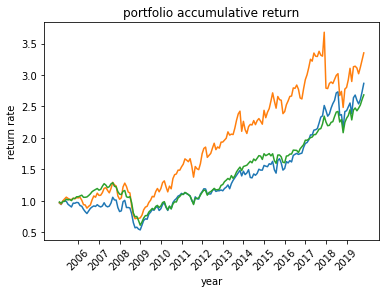

In [38]:
import matplotlib.pyplot as plt
x = [i for i in range(len(our_revenue_progressive)-1)]
plt.plot(x, our_revenue_progressive[1:])
plt.plot(x, lone_pine_revenue_progressive[1:])
plt.plot(x, snp500_close)
plt.xticks([i for i in range(11, 179, 12)],[str(i) for i in range(2006, 2020, 1)], rotation=45)
plt.title("portfolio accumulative return")
plt.xlabel("year")
plt.ylabel("return rate")
plt.show()

In [40]:
final_df

,date,ticker,class
0,200502,A,0
1,200502,ADP,0
2,200502,ADTN,0
3,200502,AET,0
4,200502,AKAM,0
5,200502,AMTD,0
6,200502,AMX,L
7,200502,ANF,A
8,200502,APOL,A
9,200502,AZN,0


In [43]:
test = tool.f13_data.merge(final_df, left_on=['Ticker', 'Date'], right_on=['ticker', 'date'])

In [68]:
len(test[test['date']=='201709'])

18

In [57]:
len(tool.f13_data[tool.f13_data['Date']=='201912'])

49

In [78]:
revenue_rate.portfolio.corr(revenue_rate.lone_pine)

0.8140387418138387

In [76]:
revenue_rate

,date,portfolio,lone_pine,portfolio_progressive,lone_pine_progressive
0,200502,1.001662,1.007344,1.001662,1.007344
1,200503,0.964308,0.961052,0.965910,0.968109
2,200504,0.973510,0.976427,0.940324,0.945288
3,200505,1.050704,1.055775,0.988002,0.998011
4,200506,1.009786,1.031384,0.997670,1.029333
5,200507,0.993319,1.027357,0.991005,1.057492
6,200508,0.952802,0.981420,0.944231,1.037844
7,200509,0.976197,0.983209,0.921756,1.020417
8,200510,0.977672,0.998525,0.901176,1.018912
9,200511,1.067791,1.022199,0.962267,1.041531


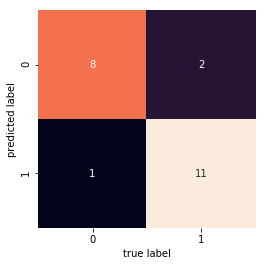

In [55]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [2]:
f13_data = tool.f13_data
price_data = tool.price_data

# season_date_list = ['201909', '201906', '201903', '201812']
f13_data = f13_data[f13_data['Date'].isin(season_date_list)]

all_date = sorted(list(set(price_data['Date'].astype('int'))))
final = pd.DataFrame(columns=['ticker', 'class', 'volatility', 'liquidity', '52 week high', 'momentum'])
for date, df in f13_data.groupby('Date'):
    index = all_date.index(int(date))
    start = index - 12
    end = index
    if start < 0:
        start = 0
    last_12month = all_date[start:end]
    last_12month = [str(i) for i in last_12month]
    last_year_price = price_data[price_data['Date'].isin(last_12month)]
    df = last_year_price.merge(df[['Ticker', 'Class']], on=['Ticker', 'Class'])
    for group, df1 in df.groupby(['Ticker', 'Class']):
        ticker, cls = group
        max_price = max(df1['ASKHI'])
        min_price = min(df1['BIDLO'])
        week_high = max_price / min_price
        df1 = df1.sort_values('Date').reset_index(drop=True)
        df_len = len(df1)
        mom = np.mean(df1[df_len-2:df_len]['PRC']) / np.mean(df1['PRC'])
        df1 = df1[df1['Date']==last_12month[-1]].reset_index(drop=True)
        vol = df1['VOL'][0]
        liq = vol / df1['SHROUT'][0]
        final.loc[-1] = [ticker, cls, vol, liq, week_high, mom]
        final = final.reset_index(drop=True)

In [5]:
final

,ticker,class,volatility,liquidity,52 week high,momentum
0,ADBE,0,813790.0,1.668755,1.644324,1.068183
1,ADSK,0,511872.0,2.337219,1.514451,1.051375
2,AMZN,0,1393304.0,2.849473,1.798589,1.008797
3,ATVI,0,2455742.0,3.218320,1.696988,0.850249
4,BABA,0,4563960.0,4.019301,1.580897,0.850474
5,BKNG,0,93368.0,2.015282,1.260313,0.934180
6,CP,0,126167.0,0.884749,1.299009,1.077932
7,CRM,0,1657478.0,2.166638,1.606710,1.073983
8,CSX,0,1036978.0,1.228036,1.495938,1.103365
9,EA,0,963326.0,3.188459,1.801500,0.747773
